<a href="https://colab.research.google.com/github/deebuls/devblog/blob/master/notebooks_/2020_05_19_Plot_Inverse_Gamma_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Inverse Gamma Distirbution
> "Python plot Inverse Gamma Distirbution"

- toc: false
- branch: master
- badges: true
- comments: true
- categories: [probability, python, plotting, matplotlib]
- hide: true
- search_exclude: true

Scipy stats doesnt have Normal Inverse Gamma distirbution.

We would like to incorporate Normal Inverse Gamma distirbution in "scipy.stats" package.

Learning about Normal Inverse Gamma(NIG) distribution will lead you to a plot like this from wikipedia. ![NIG Plot](https://upload.wikimedia.org/wikipedia/commons/4/48/Normal-inverse-gamma.svg).

It was intruiging enough to find out how to plot this graph in python and was sure that there will be some already plots available. But to my suprise there is no blogs or docs to plot NIG in python. The closest I found was in R langugage in [1] by Frank Portman. 

So I spent some time to plot NIG in python below is the snippet for it. Special thanks to Jake Vadendeplas[2] for his wonderful blogs about visualization in python.





2.302585092994046
0.6974149070059541 5.302585092994046


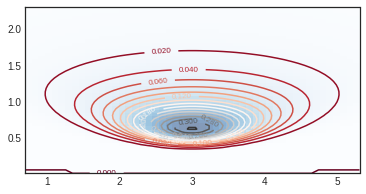

In [177]:
from scipy.stats import rv_continuous
from scipy.stats import norm
from scipy.stats import gengamma
from scipy.special import gamma
from scipy.stats import expon
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

class norminvgamma():
  r"""A normal inverse gamma random variable.
    The mu (``mu``) keyword specifies the parmaeter mu.
    %(before_notes)s
    Notes
    -----
    The probability density function for `norminvgamma` is:
    .. math::
        x = [\mu, \sigma^2]
        f(x | \delta, \alpha, \beta, \lamda) = 
               \sqrt(\frac{\lamda}{2 \pi x[\sigma^2}])
               \frac{\beta^\alpha}{\gamma(\alpha)}
               \frac{1}{x[\sigma^2]}^(\alpha + 1)
               \exp(- \frac{2\beta + \lamda(x[\mu] - delta)^2}{2 x[\sigma^2] })
        
    for a real number :math:`x` and for positive number :math: `\sigma^2` > 0
    %(after_notes)s
    %(example)s
    """
  def __init__(self, delta, alpha, beta, lamda):
    self.argcheck(delta, alpha, beta, lamda)
    self.delta = delta
    self.alpha = alpha
    self.beta = beta
    self.lamda = lamda

  def argcheck(self, delta, alpha, beta, lamda):
        return (alpha > 0) 

  def rvs(self, size=1):
    sigma_2 = gengamma.rvs(self.alpha, self.beta,  size=size)
    sigma_2 = np.array(sigma_2)
    return [[norm.rvs(self.delta, s/self.lamda), s] for s in sigma_2]
  
  def pdf(self, xmu, xsigma2):
    t1 = ((self.lamda)**0.5) * ((self.beta)**self.alpha)
    t2 = (xsigma2 * (2 * 3.15)**0.5) * gamma(self.alpha)
    t3 = (1 / xsigma2**2)**(self.alpha + 1)
    t4 = expon.pdf((2*self.beta + self.lamda*(self.delta-xmu)**2)/(2*xsigma2**2))
    #print (t1, t2, t3, t4)
    return (t1/t2)*t3*t4
    

  def stats(self):
    #ToDo
    return

  def plot(self,zoom=0.9):
    steps = 50
    max_sig_sq = gengamma.ppf(zoom, self.alpha, self.beta) * self.lamda
    print(max_sig_sq)
    mu_range = np.linspace(self.delta - 1 * max_sig_sq, self.delta + 1 * max_sig_sq, num=steps)
    print (mu_range[0], mu_range[-1])
    sigma_range = np.linspace(0.01, max_sig_sq, num=steps)
    mu_grid, sigma_grid = np.meshgrid(mu_range, sigma_range)
    pdf_mesh = self.pdf(mu_grid, sigma_grid)

    contours = plt.contour(mu_grid, sigma_grid, pdf_mesh,  20, cmap='RdGy');

    plt.clabel(contours, inline=True, fontsize=8)
    #extent=[mu_range[0], mu_range[-1], sigma_range[0], sigma_range[-1]]
    plt.imshow(pdf_mesh, extent=[mu_range[0], mu_range[-1], sigma_range[0], sigma_range[-1]],
               origin='lower', cmap='Blues', alpha=0.5)
    #plt.colorbar();

    


#norminvgamma = norminvgamma_gen()

nig = norminvgamma(delta=3,alpha=1,beta=1, lamda=1)
samples = nig.rvs(size=10)
nig.plot()

2.0433024950639633
-1.0433024950639633 3.0433024950639633


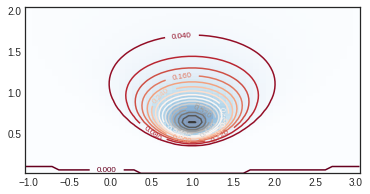

In [184]:

nig = norminvgamma(delta=1,alpha=1,beta=1, lamda=4)
samples = nig.rvs(size=10)
nig.plot(zoom=0.4)

## References


1.   https://frankportman.github.io/bayesAB/reference/plotNormalInvGamma.html
2.   https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html



In [151]:
#hide
# Extending the scipy stats
# but its more complicated
class norminvgamma_gen(rv_continuous):
  r"""A normal inverse gamma random variable.
    The mu (``mu``) keyword specifies the parmaeter mu.
    %(before_notes)s
    Notes
    -----
    The probability density function for `norminvgamma` is:
    .. math::
        x = [\mu, \sigma^2]
        f(x | \delta, \alpha, \beta, \lamda) = 
               \sqrt(\frac{\lamda}{2 \pi x[\sigma^2}])
               \frac{\beta^\alpha}{\gamma(\alpha)}
               \frac{1}{x[\sigma^2]}^(\alpha + 1)
               \exp(- \frac{2\beta + \lamda(x[\mu] - delta)^2}{2 x[\sigma^2] })
        
    for a real number :math:`x` and for positive number :math: `\sigma^2` > 0
    %(after_notes)s
    %(example)s
    """


  def _argcheck(self, delta, alpha, beta, lamda):
        return (alpha > 0) 

  def _rvs(self, delta, alpha, beta, lamda):
    print (alpha, beta)
    sigma_2 = gengamma.rvs(alpha, beta,  size=self._size)
    sigma_2 = np.array(sigma_2)
    return [[norm.rvs(delta, s/lamda), s] for s in sigma_2]
  
  def _pdf(self, x, delta, alpha, beta, lamda):
    print ("in",x.shape)
    t1 = ((lamda)**0.5) * ((beta)**alpha)
    t2 = (xsigma2 * (2 * 3.15)**0.5) * gamma(self.alpha)
    t3 = (1 / xsigma2**2)**(alpha + 1)
    t4 = expon.pdf((2*beta + lamda*(delta-xmu)**2)/(2*xsigma2**2))
    #print (t1, t2, t3, t4)
    return (t1/t2)*t3*t4
    

  def _stats(self, delta, alpha, beta, lamda):
    return

  
    

norminvgamma = norminvgamma_gen()

nig = norminvgamma(delta=1,alpha=1,beta=1, lamda=1)
samples = nig.rvs(size=10)

1 1


In [152]:
#hide
x, y = np.mgrid[-5:5:.1, 0.01:2:.01]
print (x.shape, y.shape)
pos = np.empty(x.shape + (2,))
print (pos.shape)
pos[:,:,0]= x ; pos[:,:,1] = y
nig.pdf(pos)

(100, 199) (100, 199)
(100, 199, 2)
in (39800,)


NameError: ignored